In [164]:
from PIL import Image
import os
from bids.layout import BIDSLayout, parse_file_entities
import pandas as pd

In [4]:
root = '../../derivatives/wall_of_speech_083023'
images = os.listdir(root)

task_list = ['emosent', 'pataka','nwr','vowel']
img_by_task = {t:[f'{root}/{i}' for i in images if t in i] for t in task_list}

In [167]:
def find_unique_run_names(img_by_task):
    run_names = []

    for tk,im in img_by_task.items():
        for val in im: #go through each image in list of images
            if 'LH' in val:
                name = val.split('_LH')[0]
            else:
                name = val.split('_RH')[0]
            sub = parse_file_entities(name)['subject']
            ses = parse_file_entities(name)['session']
            run = parse_file_entities(name)['run']
            unique_name = f'sub-{sub}_ses-{ses}_run-{run}'
            if unique_name not in run_names:
                run_names.append(unique_name)
    
    return run_names
        
        
        
        
            

In [168]:
run_names = find_unique_run_names(img_by_task)

In [ ]:
for rn in run_names:
    items = parse_file_entities('/' + rn)
    for tk,im in img_by_task.items():
        tile = []
        for val in im:
            if items['subject'] in val:
                if tk in val:
                    if 'ses-' + items['session'] in val:
                        if 'run-' + str(items['run']) in val:
                            tile.append(val)
            if tile:
                tile.sort(key=lambda s:s.split('H_')[1])
                combine_images(images = tile, columns=2, space = 1, out_file=f'{root}/run_tiles/{rn}_task-{tk}.png')

                        
                            

In [104]:
blank = [f'{root}/{f}' for f in os.listdir(f'{root}/') if 'blank' in f]
combine_images(images = blank, columns=2, space = 1, out_file=f'{root}/run_tiles/blank.png')


In [170]:
# blank_tile = f'{root}/run_tiles/blank.png'

# for task in task_list:
#     task_tiles = [f for f in os.listdir(f'{root}/run_tiles/') if task in f]
#     task_all = []
#     for rn in run_names:
#         match = [ta for ta in task_tiles if rn in ta]
#         if match:
#             task_all.append(f'{root}/run_tiles/' + match[0])
#         else:
#             task_all.append(blank_tile)


# combine_images(images = task_all, columns=1, space = 1, out_file=f'{root}/task_col/{task}.png')

In [179]:
task = 'emosent'

task_tiles = [f for f in os.listdir(f'{root}/run_tiles/') if task in f]
task_all = []
for rn in run_names:
    match = [ta for ta in task_tiles if rn in ta]
    if match:
        task_all.append(f'{root}/run_tiles/' + match[0])
    else:
        task_all.append(blank_tile)


combine_images(images = task_all, columns=1, space = 1, out_file=f'{root}/task_col/{task}.png')

In [185]:
task_col = os.listdir(f'{root}/task_col/')
task_col = [f'{root}/task_col/{t}' for t in task_col]
combine_images(images=task_col, columns=4, space = 1, out_file= f'{root}/wall_of_speech/wall_of_speech.png')

In [186]:
Image.open(f'{root}/wall_of_speech/wall_of_speech.png')

DecompressionBombError: Image size (353468911 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [147]:

def make_task_col(run_names, task_list):
    blank_tile = f'{root}/run_tiles/blank.png'

    for task in task_list:
        task_tiles = [f for f in os.listdir(f'{root}/run_tiles/') if task in f]
        task_all = []
        for rn in run_names:
            match = [rn for ta in task_tiles if rn in ta]
            if match:
                task_all.append(f'{root}/run_tiles/' + match[0])
            else:
                task_all.append(blank_tile)


        combine_images(images = task_all, columns=1, space = 1, out_file=f'{root}/task_col/{task}.png')

    
#     for pt in pataka_tiles:
#         if rn in pt:
#             pataka_all.append([rn for pt in pataka_tiles if rn in pt][0])
#         else:
            
            

In [134]:
pataka_all

['../../derivatives/wall_of_speech_083023/run_tiles/blank.png',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice844_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice846_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice846_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice849_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/blank.png',
 '../../derivatives/wall_of_speech_083023/run_tiles/blank.png',
 '../../derivatives/wall_of_speech_083023/run_tiles/blank.png',
 '../../derivatives/wall_of_speech_083023/run_tiles/blank.png',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice867_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice867_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/blank.png',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice873_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice87

In [166]:
def combine_images(images, columns, space, out_file):
    rows = len(images) // columns
    if len(images) % columns:
        rows += 1
    width_max = max([Image.open(image).width for image in images])
    height_max = max([Image.open(image).height for image in images])
    background_width = width_max*columns + (space*columns)-space
    background_height = height_max*rows + (space*rows)-space
    background = Image.new('RGBA', (background_width, background_height), (255, 255, 255, 255))
    x = 0
    y = 0
    for i, image in enumerate(images):
        img = Image.open(image)
        x_offset = int((width_max-img.width)/2)
        y_offset = int((height_max-img.height)/2)
        background.paste(img, (x+x_offset, y+y_offset))
        x += width_max + space
        if (i+1) % columns == 0:
            y += height_max + space
            x = 0
    background.save(out_file)




In [85]:
tile_path = 
tile_path

'../../derivatives/wall_of_speech_083023/run_tiles/sub-voice984_ses-1_run-3.png'

In [83]:
[f'{tile_path}/{r}.png' for r in run_names]

['../../derivatives/wall_of_speech_083023/run_tiles/sub-voice844_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice844_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice846_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice846_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice849_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice854_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice854_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice859_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice859_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice867_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice867_ses-1_run-2',
 '../../derivatives/wall_of_speech_083023/run_tiles/sub-voice872_ses-1_run-1',
 '../../derivatives/wall_of_speech_083023/run_tiles/

In [73]:
a = test['sub-voice844_ses-1_run-1']['emosent']#.split("H_")[1]#.sort(key=lambda s: s.split("H_")[1])
a.sort(key=lambda s:s.split('H_')[1])
a

['../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_LH_lateral.png',
 '../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_RH_lateral.png',
 '../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_LH_medial.png',
 '../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_RH_medial.png']

In [74]:
combine_images(images = a, columns=2, space = 1)


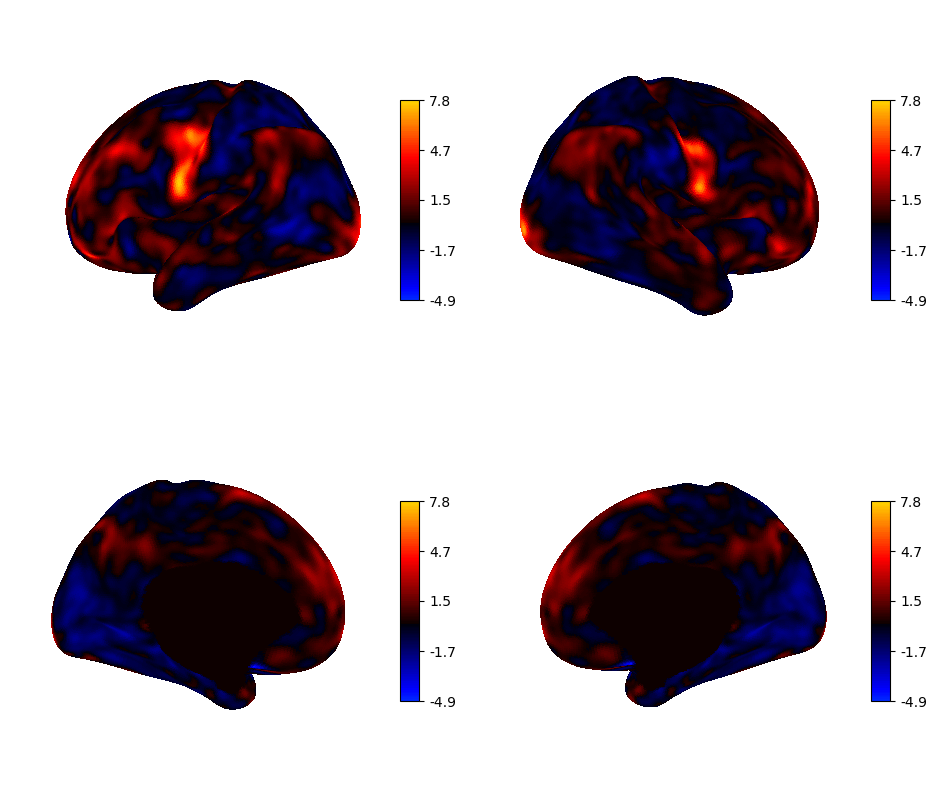

In [19]:
# images = [f'{root}/sub-voice844_ses-1_task-emosent_run-1_LH_lateral.png', 
#           f'{root}/sub-voice844_ses-1_task-emosent_run-1_LH_medial.png',
#          f'{root}/sub-voice844_ses-1_task-emosent_run-1_RH_lateral.png',
#          f'{root}/sub-voice844_ses-1_task-emosent_run-1_RH_medial.png']
# images

['../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_LH_lateral.png',
 '../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_LH_medial.png',
 '../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_RH_lateral.png',
 '../../derivatives/wall_of_speech_083023/sub-voice844_ses-1_task-emosent_run-1_RH_medial.png']

In [26]:
# combine_images(columns=2, space=20, images=images)

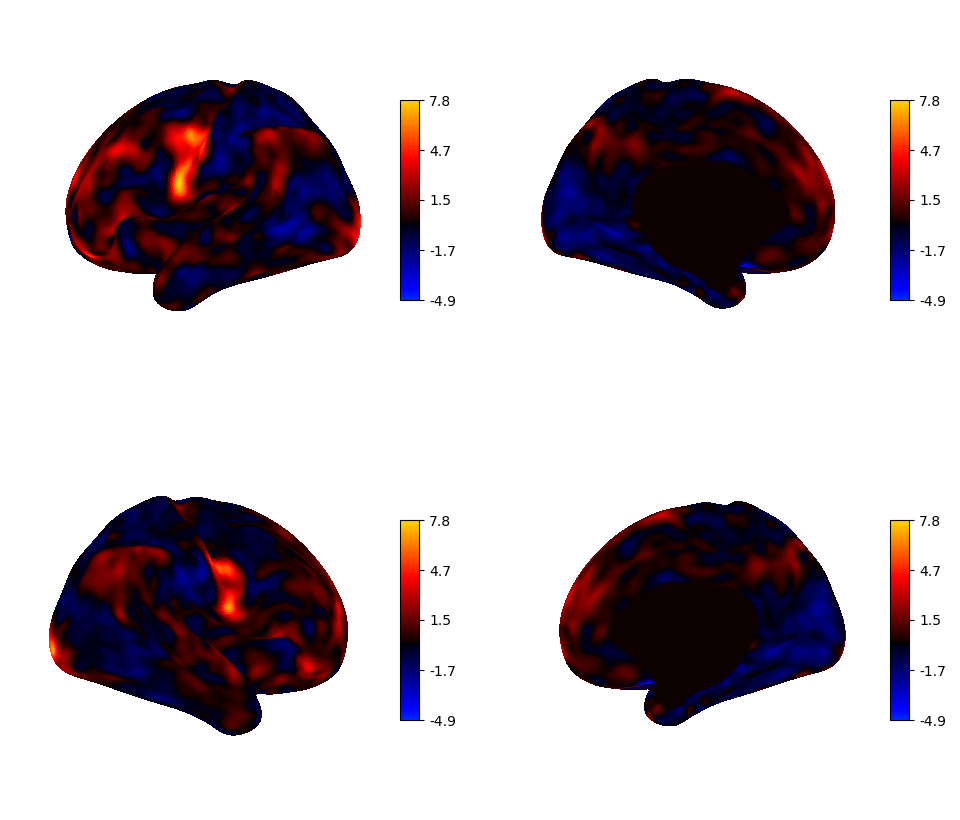

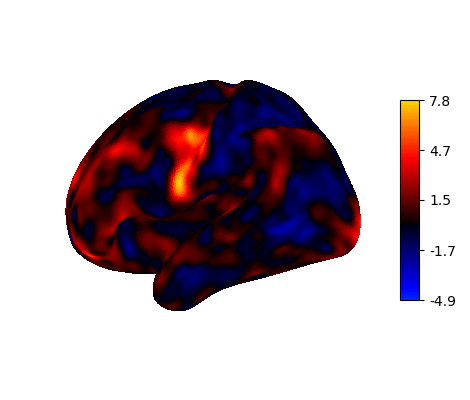

In [5]:
Image.open(f'{root}/sub-voice844_ses-1_task-emosent_run-1_LH_lateral.png')